<a href="https://colab.research.google.com/github/MafikengZ/Distributions/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Load dataset
df_train = pd.read_csv("sample_data/df_train.csv", index_col=0)
df_test = pd.read_csv("sample_data/df_test.csv", index_col=0)

#Insurance dataset
copy_train = df_train.copy()
copy_test = df_test.copy()

In [5]:
sns.set(style="darkgrid") # set seaborn style

In [6]:
df_train.isna().sum()

time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather_id          0
Seville_temp  

In [7]:
print(f'Train data shape: {df_train.shape}  |  Test data shape: {df_test.shape}')

Train data shape: (8763, 48)  |  Test data shape: (2920, 47)


In [8]:
missing_values_train = df_train.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 2068  |   Percentage: 23.6%


In [9]:
missing_values_test = df_test.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_test}  |   Percentage: {round(( missing_values_test / df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 454  |   Percentage: 5.18%


In [10]:
mode = pd.concat([df_train.Valencia_pressure , df_test.Valencia_pressure]).mode()

In [11]:
#Impute missing values in Valencia_pressure with mean
df_train.Valencia_pressure.fillna(mode[0] , inplace=True)
df_test.Valencia_pressure.fillna(mode[0], inplace=True)

In [12]:
missing_values_train = df_train.Valencia_pressure.isna().sum()
print(f'Train data Missing Values: {missing_values_train}  |   Percentage: {round(( missing_values_train/ df_train.Valencia_pressure.shape[0]) *100, 2)}%')

Train data Missing Values: 0  |   Percentage: 0.0%


In [13]:
print(f'Sum of unique object: {df_train.Valencia_wind_deg.value_counts().count()}')
df_train.Valencia_wind_deg.unique()

Sum of unique object: 10


array(['level_5', 'level_10', 'level_9', 'level_8', 'level_7', 'level_6',
       'level_4', 'level_3', 'level_1', 'level_2'], dtype=object)

In [14]:
print(f'Sum of unique object: {df_train.Seville_pressure.value_counts().count()}')
df_train.Seville_pressure.unique()

Sum of unique object: 25


array(['sp25', 'sp23', 'sp24', 'sp21', 'sp16', 'sp9', 'sp15', 'sp19',
       'sp22', 'sp11', 'sp8', 'sp4', 'sp6', 'sp13', 'sp17', 'sp20',
       'sp18', 'sp14', 'sp12', 'sp5', 'sp10', 'sp7', 'sp3', 'sp2', 'sp1'],
      dtype=object)

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder , StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , cross_validate

In [16]:
#Impute Categirical features using OrdinalEncoder()
enc = OrdinalEncoder()

In [17]:
df_train.Valencia_wind_deg = enc.fit_transform(df_train[['Valencia_wind_deg']])
df_train.Seville_pressure = enc.fit_transform(df_train[['Seville_pressure']])

In [18]:
df_test.Valencia_wind_deg = enc.fit_transform(df_test[['Valencia_wind_deg']])
df_test.Seville_pressure = enc.fit_transform(df_test[['Seville_pressure']])

In [19]:
df_test.dtypes.value_counts()

float64    44
int64       2
object      1
dtype: int64

In [20]:
# Transform Features

import datetime as dt

df_train['time'] = pd.to_datetime(df_train['time'])
df_test['time'] = pd.to_datetime(df_test['time'])
df_test_copy = df_test.copy()


# day
df_train['Day'] = df_train['time'].dt.day
df_test['Day'] = df_test['time'].dt.day

# month
df_train['Month'] = df_train['time'].dt.month
df_test['Month'] = df_test['time'].dt.month

# year
df_train['Year'] = df_train['time'].dt.year
df_test['Year'] = df_test['time'].dt.year

# hour
df_train['Start_hour'] = df_train['time'].dt.hour
df_test['Start_hour'] = df_test['time'].dt.hour

# Drop Feature
df_train.drop(['time'] , axis=1 , inplace=True)
df_test.drop(['time'] , axis=1 , inplace=True)

In [21]:
columns = df_train.drop(['load_shortfall_3h'] , axis=1).columns

In [22]:
df_train.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h,Day,Month,Year,Start_hour
0,0.666667,5.0,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,17.0,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667,1,1,2015,3
1,0.333333,1.0,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,17.0,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667,1,1,2015,6
2,1.000000,9.0,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,17.0,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667,1,1,2015,9
3,1.000000,8.0,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,17.0,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667,1,1,2015,12
4,1.000000,7.0,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,17.0,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1018.000000,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667,1,1,2015,15


In [23]:
#Scale the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features_test = scaler.fit_transform(df_test.values)

In [24]:
df_train_scaled = pd.DataFrame(scaled_features, index=df_train.index, columns=columns)
df_test_scaled = pd.DataFrame(scaled_features_test, index=df_test.index , columns=columns)

In [25]:
#Add load_short_fall_3h as last_columns on training data
df_train_scaled['load_shortfall_3h'] = copy_train.load_shortfall_3h.values

In [26]:
#Perform a test_train_split
X = df_train_scaled.drop(['load_shortfall_3h'], axis=1)
y = df_train_scaled.load_shortfall_3h

In [27]:
X.shape

(8763, 50)

## Feature Seletion

In [28]:
#Recursive Feature Selection (RFE) with Tree based and Gradient based Estimators

#Buid the Model
import pickle
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score , mean_squared_error

#OLS summary
import statsmodels.formula.api as sm

In [29]:
#Train Test Split
X = df_train.drop(['load_shortfall_3h'],axis=1)
y = df_train.load_shortfall_3h

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [30]:
X_train.shape

(5871, 50)

### Feature Selection: Feature Importance of Random Forest Regressor

In [31]:
selct_important = SelectFromModel(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1))
selct_important.fit(X_train , y_train)
selct_important.get_support()

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

In [32]:
features = X_train.columns[(selct_important.get_support())]
len(features)

10

In [33]:
features

Index(['Madrid_wind_speed', 'Valencia_wind_speed', 'Barcelona_pressure',
       'Bilbao_pressure', 'Valencia_humidity', 'Valencia_temp_min', 'Day',
       'Month', 'Year', 'Start_hour'],
      dtype='object')

In [34]:
np.mean(selct_important.estimator_.feature_importances_)

0.02

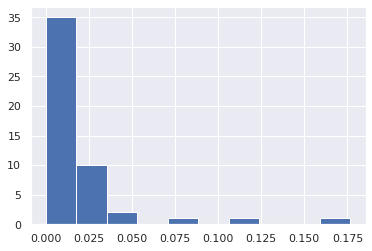

In [35]:
pd.Series(selct_important.estimator_.feature_importances_.ravel()).hist()

In [36]:
selct_important.estimator_.feature_importances_

array([3.75374765e-02, 1.06810518e-02, 3.64400679e-03, 2.13343951e-02,
       1.98307562e-02, 1.95437756e-02, 1.07118264e-02, 1.52076141e-02,
       6.81632573e-03, 1.89564637e-02, 1.31742030e-02, 1.99215747e-02,
       8.55181594e-03, 1.25037484e-02, 4.71077478e-03, 1.19946867e-02,
       1.34236631e-03, 2.88993052e-04, 2.84223519e-02, 2.20593863e-03,
       1.34678572e-03, 4.59466853e-04, 1.07164253e-06, 7.99566789e-03,
       1.05667561e-02, 3.14491826e-02, 7.00517402e-03, 1.20339624e-02,
       1.67510288e-02, 1.65020531e-02, 1.10425223e-02, 6.83643145e-03,
       1.10800062e-02, 1.08664686e-02, 2.61404858e-02, 2.05510596e-02,
       8.77517233e-03, 1.04044487e-02, 9.49769461e-03, 1.29571918e-02,
       1.28582813e-02, 1.99771454e-02, 1.18534650e-02, 1.23791101e-02,
       9.30332461e-03, 1.08873461e-02, 1.76666938e-01, 8.53849133e-02,
       4.64026892e-02, 1.14644012e-01])

In [37]:
X_train_sel = selct_important.transform(X_train)
X_test_sel = selct_important.transform(X_test)

In [38]:
def _randomForest_train(X_train, X_test, y_train, y_test):
    forest = RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1)
    forest.fit(X_train , y_train)
    pred = forest.predict(X_test)
    print(f'Train RMSE: { np.sqrt(mean_squared_error(y_train[:2892], pred))}')
    print(f'R Score Train: {r2_score(y_train[:2892] , pred)}')
    print(f'Test RMSE: { np.sqrt(mean_squared_error(y_test, pred))}')
    print(f'R Score Test: {r2_score(y_test , pred)}')

In [39]:
%%time
_randomForest_train(X_train_sel , X_test_sel , y_train , y_test )

Train RMSE: 6566.850926516382
R Score Train: -0.5898527069101995
Test RMSE: 3133.21158309809
R Score Test: 0.6482568328599254
CPU times: user 3.16 s, sys: 38.7 ms, total: 3.2 s
Wall time: 3.2 s


In [40]:
%%time
# All features
_randomForest_train(X_train , X_test , y_train , y_test )

Train RMSE: 6451.485904569759
R Score Train: -0.5344829989687987
Test RMSE: 3299.0390385214314
R Score Test: 0.6100390386852732
CPU times: user 15.2 s, sys: 15.3 ms, total: 15.2 s
Wall time: 15.2 s


#### Recursive Feature Selection(RFE)

In [41]:
from sklearn.feature_selection import RFE

In [42]:
r_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1), n_features_to_select=14)

In [43]:
r_selection.fit(X_train , y_train)

RFE(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                    criterion='mse', max_depth=None,
                                    max_features='auto', max_leaf_nodes=None,
                                    max_samples=None, min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators=100, n_jobs=1, oob_score=False,
                                    random_state=0, verbose=0,
                                    warm_start=False),
    n_features_to_select=14, step=1, verbose=0)

In [44]:
r_selection.get_support()

array([ True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True,  True,  True,  True])

In [45]:
features1 = X_train.columns[(r_selection.get_support())]
len(features)

10

In [46]:
features1

Index(['Madrid_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Barcelona_pressure', 'Bilbao_pressure', 'Seville_temp_max',
       'Valencia_humidity', 'Valencia_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Day', 'Month', 'Year', 'Start_hour'],
      dtype='object')

In [47]:
r_selection.estimator_.feature_importances_

array([0.05731169, 0.04368111, 0.0453217 , 0.05663009, 0.05994624,
       0.04378012, 0.05414302, 0.05134141, 0.04963329, 0.04866258,
       0.20270909, 0.0996054 , 0.05517294, 0.1320613 ])

In [48]:
X_train_r = r_selection.transform(X_train)
X_test_r = r_selection.transform(X_test)

In [49]:
%%time
_randomForest_train(X_train_r , X_test_r , y_train , y_test )

Train RMSE: 6540.670900620246
R Score Train: -0.577201462761616
Test RMSE: 3223.9058920542975
R Score Test: 0.6275989173941283
CPU times: user 5.04 s, sys: 12 ms, total: 5.05 s
Wall time: 5.05 s


In [50]:
%%time
# All features
_randomForest_train(X_train , X_test , y_train , y_test )

Train RMSE: 6451.485904569759
R Score Train: -0.5344829989687987
Test RMSE: 3299.0390385214314
R Score Test: 0.6100390386852732
CPU times: user 15.2 s, sys: 19 ms, total: 15.2 s
Wall time: 15.1 s


### Feature Selection: GradientBoostRegressor

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
grad_selection = RFE(GradientBoostingRegressor(n_estimators=100 , random_state=0), n_features_to_select=10)
grad_selection.fit(X_train , y_train)

RFE(estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                        criterion='friedman_mse', init=None,
                                        learning_rate=0.1, loss='ls',
                                        max_depth=3, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_iter_no_change=None,
                                        presort='deprecated', random_state=0,
                                        subsample=1.0, tol=0.0001,
                                        validation_fraction=0.1, verbose=0,
                                        warm_start=False),
    n_feat

In [53]:
grad_selection.get_support()

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True])

In [54]:
features2 = X_train.columns[(grad_selection.get_support())]
len(features)

10

In [55]:
features2

Index(['Madrid_wind_speed', 'Barcelona_pressure', 'Bilbao_pressure',
       'Valencia_humidity', 'Valencia_temp_min', 'Barcelona_temp', 'Day',
       'Month', 'Year', 'Start_hour'],
      dtype='object')

In [56]:
grad_selection.estimator_.feature_importances_

array([0.04338314, 0.03450376, 0.02898288, 0.0403738 , 0.02676491,
       0.03227044, 0.30980752, 0.15115311, 0.08479699, 0.24796344])

In [57]:
X_train_g = grad_selection.transform(X_train)
X_test_g = grad_selection.transform(X_test)

In [58]:
%%time
_randomForest_train(X_train_g , X_test_g , y_train , y_test )

Train RMSE: 6571.764329370291
R Score Train: -0.5922326936892679
Test RMSE: 3116.485241651809
R Score Test: 0.6520023012056524
CPU times: user 3.36 s, sys: 6 ms, total: 3.37 s
Wall time: 3.37 s


In [83]:
%%time
#All features
_randomForest_train(X_train , X_test , y_train , y_test )

Train RMSE: 6451.485904569759
R Score Train: -0.5344829989687987
Test RMSE: 3299.0390385214314
R Score Test: 0.6100390386852732
CPU times: user 12.9 s, sys: 23 ms, total: 12.9 s
Wall time: 12.8 s


### Feature Selection: Random Forest Tree & Gardient Boost - 50 Iterations

In [ ]:
print('>'*40 + 'GradientBoostRegressor'+ '<'*40)
for index in range(1 , 51):
    grad_selection = RFE(GradientBoostingRegressor(n_estimators=100 , random_state=0), n_features_to_select=index)
    grad_selection.fit(X_train , y_train)
    X_train_g = grad_selection.transform(X_train)
    X_test_g = grad_selection.transform(X_test)
    print(f'Selected Features: {index}')
    _randomForest_train(X_train_g , X_test_g , y_train , y_test )
    print()

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>GradientBoostRegressor<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Selected Features: 1
Train RMSE: 5596.211496159882
R Score Train: -0.15459803548445872
Test RMSE: 4883.725002979564
R Score Test: 0.14542806596204305

Selected Features: 2
Train RMSE: 5968.113642778917
R Score Train: -0.3131572750742979
Test RMSE: 4635.641125359093
R Score Test: 0.23004412513412542

Selected Features: 3
Train RMSE: 6742.681308837149
R Score Train: -0.6761305518017859
Test RMSE: 4771.049898864075
R Score Test: 0.18440577808596226

Selected Features: 4
Train RMSE: 6885.333049143121
R Score Train: -0.7478029988319388
Test RMSE: 2614.36195652199
R Score Test: 0.7551062772318131

Selected Features: 5
Train RMSE: 6829.198476647612
R Score Train: -0.7194202814823152
Test RMSE: 2864.6944717067327
R Score Test: 0.7059624179210212

Selected Features: 6
Train RMSE: 6715.420000363679
R Score Train: -0.6626044371017774
Test RMSE: 3086.715076301614
R Score Test: 0.6586190291078511


In [ ]:
print('>'*40 + 'RandomForestRegressor'+ '<'*40)
for index in range(1 , 51):
    grad_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0), n_features_to_select=index)
    grad_selection.fit(X_train , y_train)
    X_train_r = grad_selection.transform(X_train)
    X_test_r = grad_selection.transform(X_test)
    print(f'Selected Features: {index}')
    _randomForest_train(X_train_r , X_test_r , y_train , y_test )
    print()

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>RandomForestRegressor<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
Selected Features: 1
Train RMSE: 5961.727797023456
R Score Train: -0.31034863769521315
Test RMSE: 5548.522993416647
R Score Test: -0.1030647419203119

Selected Features: 2
Train RMSE: 6082.0129466940825
R Score Train: -0.36375782710645743
Test RMSE: 5595.557973636776
R Score Test: -0.12184542773697138

Selected Features: 3
Train RMSE: 6148.302900212507
R Score Train: -0.393647968049641
Test RMSE: 4683.25298221174
R Score Test: 0.21414673915095028

Selected Features: 4
Train RMSE: 6351.9547974308425
R Score Train: -0.4875013662940193
Test RMSE: 4233.0732731856815
R Score Test: 0.3579663437104904

Selected Features: 5
Train RMSE: 6501.353914218359
R Score Train: -0.5582968485059814
Test RMSE: 3638.813179734356
R Score Test: 0.5255769939259858

Selected Features: 6
Train RMSE: 6530.032051988369
R Score Train: -0.5720747834685467
Test RMSE: 3355.3820754647095
R Score Test: 0.59660530433128

In [59]:
grad_sel = RFE(GradientBoostingRegressor(n_estimators=100 , random_state=0), n_features_to_select=4)
grad_sel.fit(X_train , y_train)
X_train_g = grad_sel.transform(X_train)
X_test_g = grad_sel.transform(X_test)
print(f'Selected Features: {4}')
_randomForest_train(X_train_g , X_test_g , y_train , y_test )

Selected Features: 4
Train RMSE: 6885.333049143121
R Score Train: -0.7478029988319388
Test RMSE: 2614.36195652199
R Score Test: 0.7551062772318131


In [61]:
best_feat1 = X_train.columns[(grad_sel.get_support())]
len(best_feat1)

4

In [62]:
best_feat1

Index(['Day', 'Month', 'Year', 'Start_hour'], dtype='object')

In [63]:
forest_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0, n_jobs=1), n_features_to_select=10)
forest_selection.fit(X_train , y_train)
X_train_g = forest_selection.transform(X_train)
X_test_g = forest_selection.transform(X_test)
print(f'Selected Features: {10}')
_randomForest_train(X_train_g , X_test_g , y_train , y_test )

Selected Features: 10
Train RMSE: 6587.3247023850445
R Score Train: -0.5997816759463324
Test RMSE: 3107.9526333594467
R Score Test: 0.6539052546720269


In [65]:
best_feat2 = X_train.columns[(forest_selection.get_support())]
len(best_feat2)

10

In [67]:
best_feat2

Index(['Madrid_wind_speed', 'Barcelona_pressure', 'Bilbao_pressure',
       'Valencia_humidity', 'Valencia_temp_min', 'Bilbao_temp', 'Day', 'Month',
       'Year', 'Start_hour'],
      dtype='object')

In [68]:
best_features = ['Day', 'Month', 'Year', 'Start_hour']

In [69]:
X = df_test[best_features]
X.columns

Index(['Day', 'Month', 'Year', 'Start_hour'], dtype='object')

In [77]:
#Train a model
regression = [
    # GradientBoostingRegressor(n_estimators=100 , random_state=0),
    # LinearRegression(),
    RandomForestRegressor(n_estimators=100, random_state=0 , n_jobs=1)
    ]

In [82]:
from sklearn import metrics
print('-'*40 + 'Trained Succesfully' + '-'*40 + '\n')
for items in regression:
    model = items
    model.fit(X_train[best_features],y_train)
    train_model = model.predict(X_train[best_features])
    test_model = model.predict(X_test[best_features])
    
  
    #Dictionary of results
    results_dict = {'Training':
                        {
                            "RMSE": np.sqrt(metrics.mean_squared_error(y_train, train_model)),
                            'R2 Score': r2_score(y_train ,train_model)
                            
                        },
                    'Test':
                        {
                            "RMSE": np.sqrt(metrics.mean_squared_error(y_test, test_model)),
                            'R2 Score': r2_score(y_test ,test_model)

                        }
                    
                   }
    scores = pd.DataFrame(data=results_dict)
    print(scores)
    print('-'*50+'End'+'-'*50)
    print()
    y_pred =  model.predict(X)
    daf = pd.DataFrame(y_pred, columns=['load_shortfall_3h'])
    output = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})
    submissionF = output.join(daf)
    submissionF['load_shortfall_3h'] = daf.values
    submissionF.to_csv("submissionF.csv", index=False)
    print(submissionF)



----------------------------------------Trained Succesfully----------------------------------------

            Training         Test
RMSE      961.322765  2614.361957
R2 Score    0.965627     0.755106
--------------------------------------------------End--------------------------------------------------

                    time  load_shortfall_3h
0    2018-01-01 00:00:00       11749.896667
1    2018-01-01 03:00:00       10373.820000
2    2018-01-01 06:00:00        6631.756667
3    2018-01-01 09:00:00        8010.643333
4    2018-01-01 12:00:00        9841.376667
...                  ...                ...
2915 2018-12-31 09:00:00         123.926667
2916 2018-12-31 12:00:00        2197.706667
2917 2018-12-31 15:00:00        2029.643333
2918 2018-12-31 18:00:00        2176.426667
2919 2018-12-31 21:00:00        2906.006667

[2920 rows x 2 columns]
